<a href="https://colab.research.google.com/github/gangsterKitty/hello-world/blob/master/NMF_MNIST_decompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
dataset = datasets.MNIST('./ML_data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

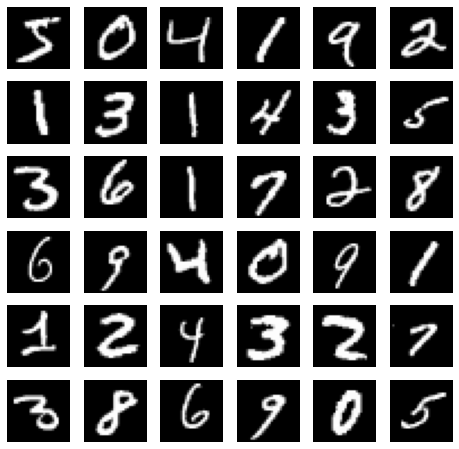

In [157]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 6
for i in range(1, cols * rows + 1):
    img, label = dataset[i-1]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [208]:
from sklearn.decomposition import NMF
import numpy as np

idx = [1, 3, 5, 7, 9, 0, 18, 15, 17, 4]
model = NMF(n_components=16, init='random', random_state=0)
X = np.zeros((32,784), float)
for i in range(32):
  X[i,:] = torch.reshape(dataset[i+400][0], (-1,)).detach().numpy()
W = model.fit_transform(X)
H = model.components_

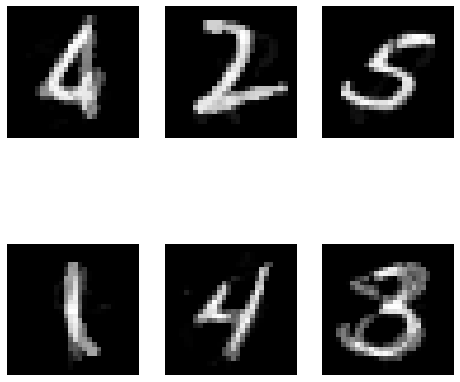

In [205]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 2
for i in range(0, cols * rows):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(H[i,:].reshape((28,28)).squeeze(), cmap="gray")
plt.show()

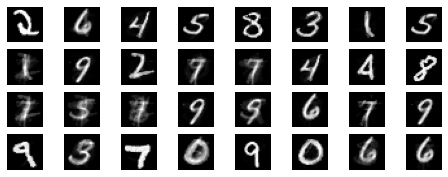

In [209]:
figure = plt.figure(figsize=(8, 3))
cols, rows = 8, 4
for i in range(0, cols * rows):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(np.matmul(W, H)[i,:].reshape((28,28)).squeeze(), cmap="gray")
plt.show()

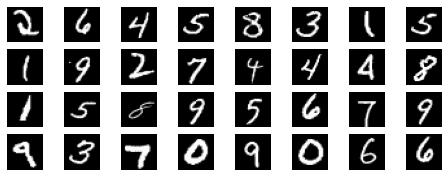

In [210]:
figure = plt.figure(figsize=(8, 3))
cols, rows = 8, 4
for i in range(0, cols * rows):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(X[i,:].reshape((28,28)).squeeze(), cmap="gray")
plt.show()

In [200]:
W.shape

(16, 8)